In [ ]:
"""import numpy as np
import pandas as pd
from datetime import datetime, timedelta

# Definimos los intervalos de horas para las diferentes partes del día
morning_hours = range(6, 12)
noon_hours = range(12, 18)
night_hours = range(18, 24)

# Generamos una lista de fechas para un año
start_date = datetime(year=2022, month=1, day=1)
end_date = datetime(year=2022, month=12, day=31)
dates = pd.date_range(start=start_date, end=end_date, freq='D')

# Generamos un conjunto de datos aleatorios para cada fecha y hora
data = []
data = []
for date in dates:
    for hour in range(0, 24):
        if hour in morning_hours:
            temp = np.random.uniform(10, 20) # Temperaturas entre 10 y 20 grados Celsius para la mañana
        elif hour in noon_hours:
            temp = np.random.uniform(20, 30) # Temperaturas entre 20 y 30 grados Celsius para el mediodía
        else:
            temp = np.random.uniform(5, 15) # Temperaturas entre 5 y 15 grados Celsius para la noche
        data.append({'fecha': date.strftime('%Y-%m-%d'),
                     'hora': str(hour),
                     'temperatura': temp})

# Creamos un DataFrame con los datos generados
# guardar los datos en un archivo CSV
df = pd.DataFrame(data)
df.to_csv('temperaturas1.csv', index=False)"""

"import numpy as np\nimport pandas as pd\nfrom datetime import datetime, timedelta\n\n# Definimos los intervalos de horas para las diferentes partes del día\nmorning_hours = range(6, 12)\nnoon_hours = range(12, 18)\nnight_hours = range(18, 24)\n\n# Generamos una lista de fechas para un año\nstart_date = datetime(year=2022, month=1, day=1)\nend_date = datetime(year=2022, month=12, day=31)\ndates = pd.date_range(start=start_date, end=end_date, freq='D')\n\n# Generamos un conjunto de datos aleatorios para cada fecha y hora\ndata = []\ndata = []\nfor date in dates:\n    for hour in range(0, 24):\n        if hour in morning_hours:\n            temp = np.random.uniform(10, 20) # Temperaturas entre 10 y 20 grados Celsius para la mañana\n        elif hour in noon_hours:\n            temp = np.random.uniform(20, 30) # Temperaturas entre 20 y 30 grados Celsius para el mediodía\n        else:\n            temp = np.random.uniform(5, 15) # Temperaturas entre 5 y 15 grados Celsius para la noche\n  

In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

# Definimos los intervalos de horas para las diferentes partes del día
morning_hours = range(6, 12)
noon_hours = range(12, 18)
night_hours = range(18, 24)

# Definimos los rangos de temperaturas para cada estación del año
winter_temp_range = (0, 10) #rango de temperatura para invierno
spring_temp_range = (10, 20) #rango de temperatura para primavera
summer_temp_range = (20, 35) #rango de temperatura para verano
autumn_temp_range = (10, 20) #rango de temperatura para otoño

# Generamos una lista de fechas para un año
start_date = datetime(year=2022, month=1, day=1)
end_date = datetime(year=2022, month=12, day=31)
dates = pd.date_range(start=start_date, end=end_date, freq='D')

# Generamos un conjunto de datos aleatorios para cada fecha y hora
data = []
for date in dates:
    month = date.month
    if 3 <= month <= 5:
        # Es primavera
        temp_range = spring_temp_range
    elif 6 <= month <= 8:
        # Es verano
        temp_range = summer_temp_range
    elif 9 <= month <= 11:
        # Es otoño
        temp_range = autumn_temp_range
    else:
        # Es invierno
        temp_range = winter_temp_range
    
    for hour in range(0, 24):
        if hour in morning_hours:
            temp = np.random.uniform(temp_range[0], temp_range[1] - 5) # Menos caliente por la manana
        elif hour in noon_hours:
            temp = np.random.uniform(temp_range[0] + 5, temp_range[1]) # Mas caliente al mediodia
        else:
            temp = np.random.uniform(temp_range[0], temp_range[1] - 5) # Menos caliente por la noche
        data.append({'fecha': date.strftime('%Y-%m-%d'),
                     'hora': str(hour),
                     'temperatura': temp})

# Creamos un DataFrame con los datos generados y lo guardamos en un archivo CSV
df = pd.DataFrame(data)
df.to_csv('temperaturas1.csv', index=False)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Importar el conjunto de datos como un DataFrame de Pandas
#df = pd.read_csv('/content/time_series.csv')
df = pd.read_csv('/content/temperaturas1.csv')
data = pd.read_csv('/content/temperaturas1.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fecha        8760 non-null   object 
 1   hora         8760 non-null   int64  
 2   temperatura  8760 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 205.4+ KB


In [ ]:
df = list(df["temperatura"])
data = list(data["temperatura"])


In [ ]:
def normalize(xs):
    xs_norm = xs.copy()
    mu = np.zeros(xs.size)
    sigma = np.zeros(xs.size)
    mu = np.mean(xs, axis = 0)
    sigma = np.std(xs, axis = 0)
    xs_norm = (xs - mu) / sigma
    return xs_norm
def denormalize(xs_norm, xs):
    mu = np.mean(xs, axis=0)  # vector de medias
    sigma = np.std(xs, axis=0)  # vector de desviaciones estándar
    xs_restored = (xs_norm * sigma) + mu  # restaure los datos originales
    return xs_restored

In [ ]:
import numpy as np
import pandas as pd


print(len(df))
df = np.array(df)
data= np.array(data)
df = normalize(df)
series = []
ant = 0
for i in range(51,len(df),51):
  new_x = np.asarray(df[ant:i])
  series.append(new_x)
  ant = i
series = np.array(series)
series = series[..., np.newaxis].astype(np.float32)
print(series.shape)
print(series)

8760
(171, 51, 1)
[[[-1.5825965]
  [-1.6351559]
  [-1.52013  ]
  ...
  [-1.6725578]
  [-1.1124424]
  [-1.4695162]]

 [[-1.3185674]
  [-1.6573006]
  [-1.2168015]
  ...
  [-1.386206 ]
  [-1.1409384]
  [-1.3044491]]

 [[-1.1960876]
  [-1.4026054]
  [-1.1793894]
  ...
  [-1.4593824]
  [-1.6837677]
  [-1.5847203]]

 ...

 [[-1.1460435]
  [-1.2127088]
  [-1.5354071]
  ...
  [-1.4854399]
  [-1.6211712]
  [-1.4700295]]

 [[-1.592749 ]
  [-1.5787847]
  [-1.1614656]
  ...
  [-1.1133332]
  [-1.3268957]
  [-1.396753 ]]

 [[-1.3825732]
  [-1.3590851]
  [-1.1916147]
  ...
  [-1.3633194]
  [-1.5851156]
  [-1.1471987]]]


In [ ]:
xs_norm = normalize(df)  # normaliza la matriz original
xs_restored = denormalize(xs_norm, df)  # restaura los datos originales
xs_restored

array([-1.58259658, -1.63515592, -1.52013009, ..., -1.31075649,
       -1.18359096, -1.4200207 ])

In [ ]:
import math

n_steps = 50
train_size = math.trunc(series.shape[0] * 0.7)
eval_size = math.trunc(series.shape[0] * 0.2) + train_size
X_train, y_train = series[:train_size, :n_steps], series[:train_size, -1]
X_valid, y_valid = series[train_size:eval_size, :n_steps], series[train_size:eval_size, -1]
X_test, y_test = series[eval_size:, :n_steps], series[eval_size:, -1]
X_train.shape, y_train.shape

((119, 50, 1), (119, 1))

In [ ]:
y_normaliza = denormalize(y_test[:,-1], data)
y_normaliza

array([11.341182  , 10.919615  , 11.38977   , 15.439455  ,  8.101919  ,
        3.597083  ,  4.0658073 ,  0.40536022,  3.9669743 ,  3.0274725 ,
        0.9827652 ,  6.538506  ,  8.389914  ,  1.0216904 ,  1.7172813 ,
        1.9575443 ,  2.5793858 ,  4.6971607 ], dtype=float32)

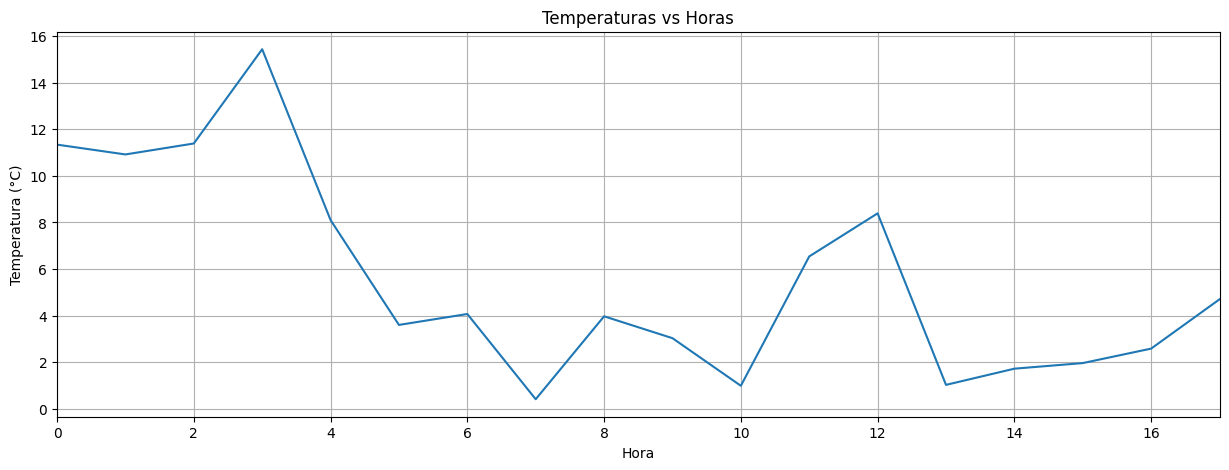

In [ ]:
import matplotlib.pyplot as plt

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size

plt.title('Temperaturas vs Horas')
plt.ylabel('Temperatura (°C)')
plt.xlabel('Hora')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot( y_normaliza)
plt.show()

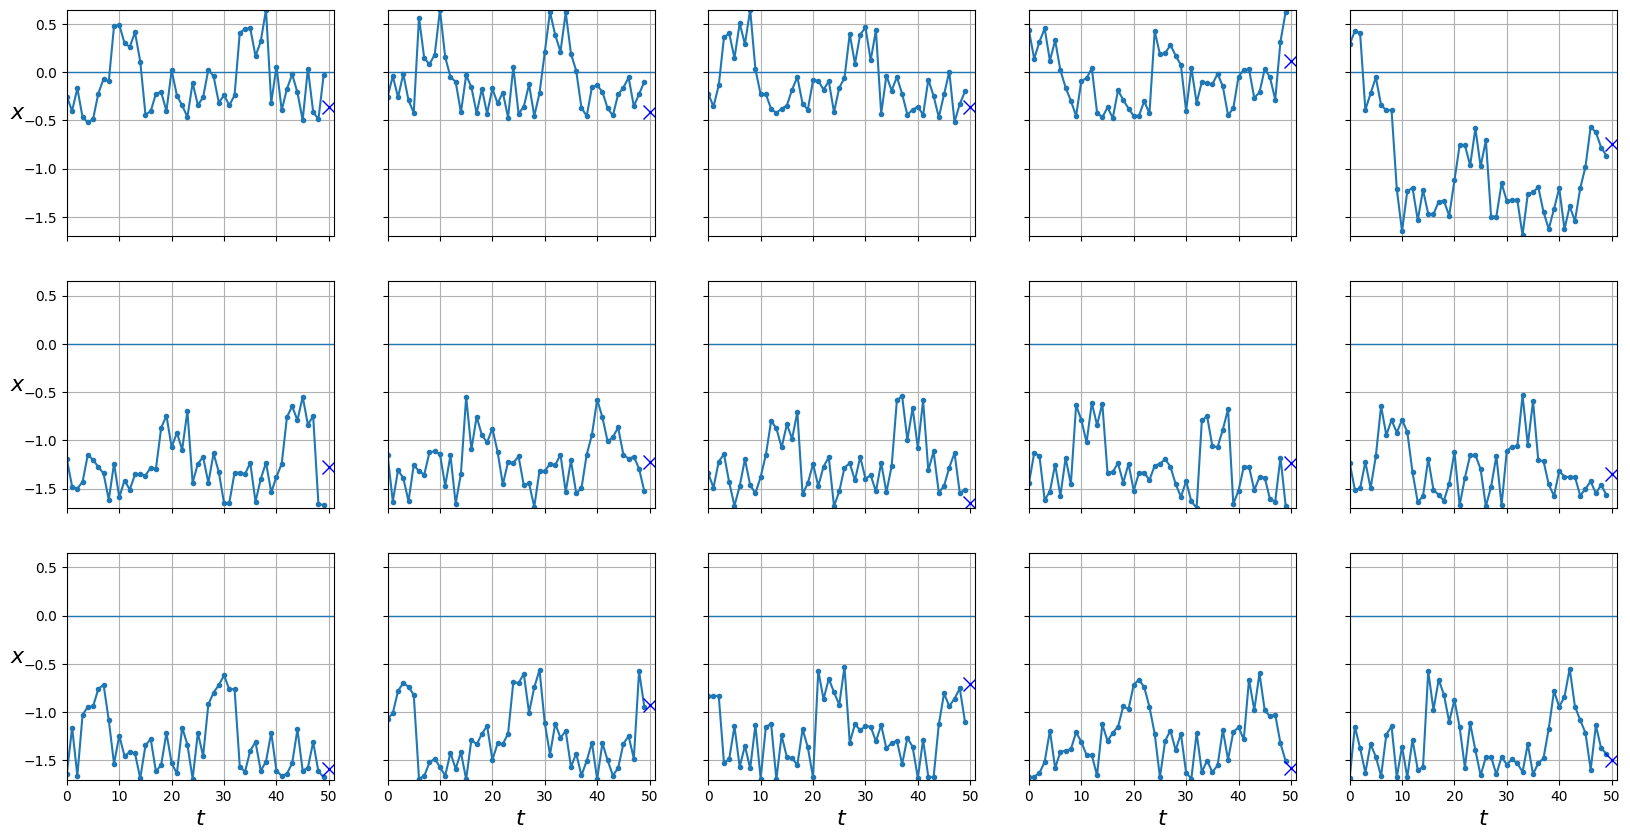

In [ ]:
import matplotlib.pyplot as plt 

def plot_series(series, y=None, y_pred=None, y_pred_std=None, x_label="$t$", y_label="$x$"):
  r, c = 3, 5
  fig, axes = plt.subplots(nrows=r, ncols=c, sharey=True, sharex=True, figsize=(20, 10))
  for row in range(r):
    for col in range(c):
        plt.sca(axes[row][col])
        ix = col + row*c
        plt.plot(series[ix, :], ".-")
        if y is not None:
            plt.plot(range(len(series[ix, :]), len(series[ix, :])+len(y[ix])), y[ix], "bx", markersize=10)
        if y_pred is not None:
            plt.plot(range(len(series[ix, :]), len(series[ix, :])+len(y_pred[ix])), y_pred[ix], "ro")
        if y_pred_std is not None:
            plt.plot(range(len(series[ix, :]), len(series[ix, :])+len(y_pred[ix])), y_pred[ix] + y_pred_std[ix])
            plt.plot(range(len(series[ix, :]), len(series[ix, :])+len(y_pred[ix])), y_pred[ix] - y_pred_std[ix])
        plt.grid(True)
        plt.hlines(0, 0, 100, linewidth=1)
        plt.axis([0, len(series[ix, :])+len(y[ix]), np.amin(series), np.amax(series)])
        if x_label and row == r - 1:
          plt.xlabel(x_label, fontsize=16)
        if y_label and col == 0:
          plt.ylabel(y_label, fontsize=16, rotation=0)
  plt.show()


plot_series(X_test, y_test)

In [ ]:
print(len(df))
df = np.array(df)
#df = normalize(df)
series = []
ant = 0
for i in range(50,len(df),50):
  new_x = np.asarray(df[ant:i])
  series.append(new_x)
  ant = i
series = np.array(series)
series = series[..., np.newaxis].astype(np.float32)
print(series.shape)
print(series)

8760
(175, 50, 1)
[[[-1.5825965 ]
  [-1.6351559 ]
  [-1.52013   ]
  ...
  [-1.4237443 ]
  [-1.6725578 ]
  [-1.1124424 ]]

 [[-1.4695162 ]
  [-1.3185674 ]
  [-1.6573006 ]
  ...
  [-1.6567769 ]
  [-1.6483953 ]
  [-1.386206  ]]

 [[-1.1409384 ]
  [-1.3044491 ]
  [-1.1960876 ]
  ...
  [-1.1274492 ]
  [-1.3833104 ]
  [-1.316395  ]]

 ...

 [[-1.1792947 ]
  [-1.1758599 ]
  [-1.5922337 ]
  ...
  [-1.5481156 ]
  [-1.4952493 ]
  [-1.2899408 ]]

 [[-1.4026222 ]
  [-1.4786211 ]
  [-0.952217  ]
  ...
  [-1.1271558 ]
  [-1.118438  ]
  [-1.3483502 ]]

 [[-0.5234924 ]
  [-0.8483464 ]
  [-0.97841746]
  ...
  [-1.6851873 ]
  [-0.6625054 ]
  [-0.5938043 ]]]


In [ ]:
import math

n_steps = 50
train_size = math.trunc(series.shape[0] * 0.7)
eval_size = math.trunc(series.shape[0] * 0.2) + train_size
X_train, Y_train = series[:train_size, :n_steps], series[:train_size, -10:, 0]
X_valid, Y_valid = series[train_size:eval_size, :n_steps], series[train_size:eval_size, -10:, 0]
X_test, Y_test = series[eval_size:, :n_steps], series[eval_size:, -10:, 0]
X_train.shape, Y_train.shape


((122, 50, 1), (122, 10))

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
class TimeSeriesDataset(Dataset):
  def __init__(self, X, y=None, train=True):
    self.X = X
    self.y = y
    self.train = train

  def __len__(self):
    return len(self.X)

  def __getitem__(self, ix):
    if self.train:
      return torch.from_numpy(self.X[ix]), torch.from_numpy(self.y[ix])
    return torch.from_numpy(self.X[ix])

In [ ]:
dataset = {
    'train': TimeSeriesDataset(X_train, Y_train),
    'eval': TimeSeriesDataset(X_valid, Y_valid),
    'test': TimeSeriesDataset(X_test, Y_test, train=False)
}

dataloader = {
    'train': DataLoader(dataset['train'], shuffle=True, batch_size=64),
    'eval': DataLoader(dataset['eval'], shuffle=False, batch_size=64),
    'test': DataLoader(dataset['test'], shuffle=False, batch_size=64)
}

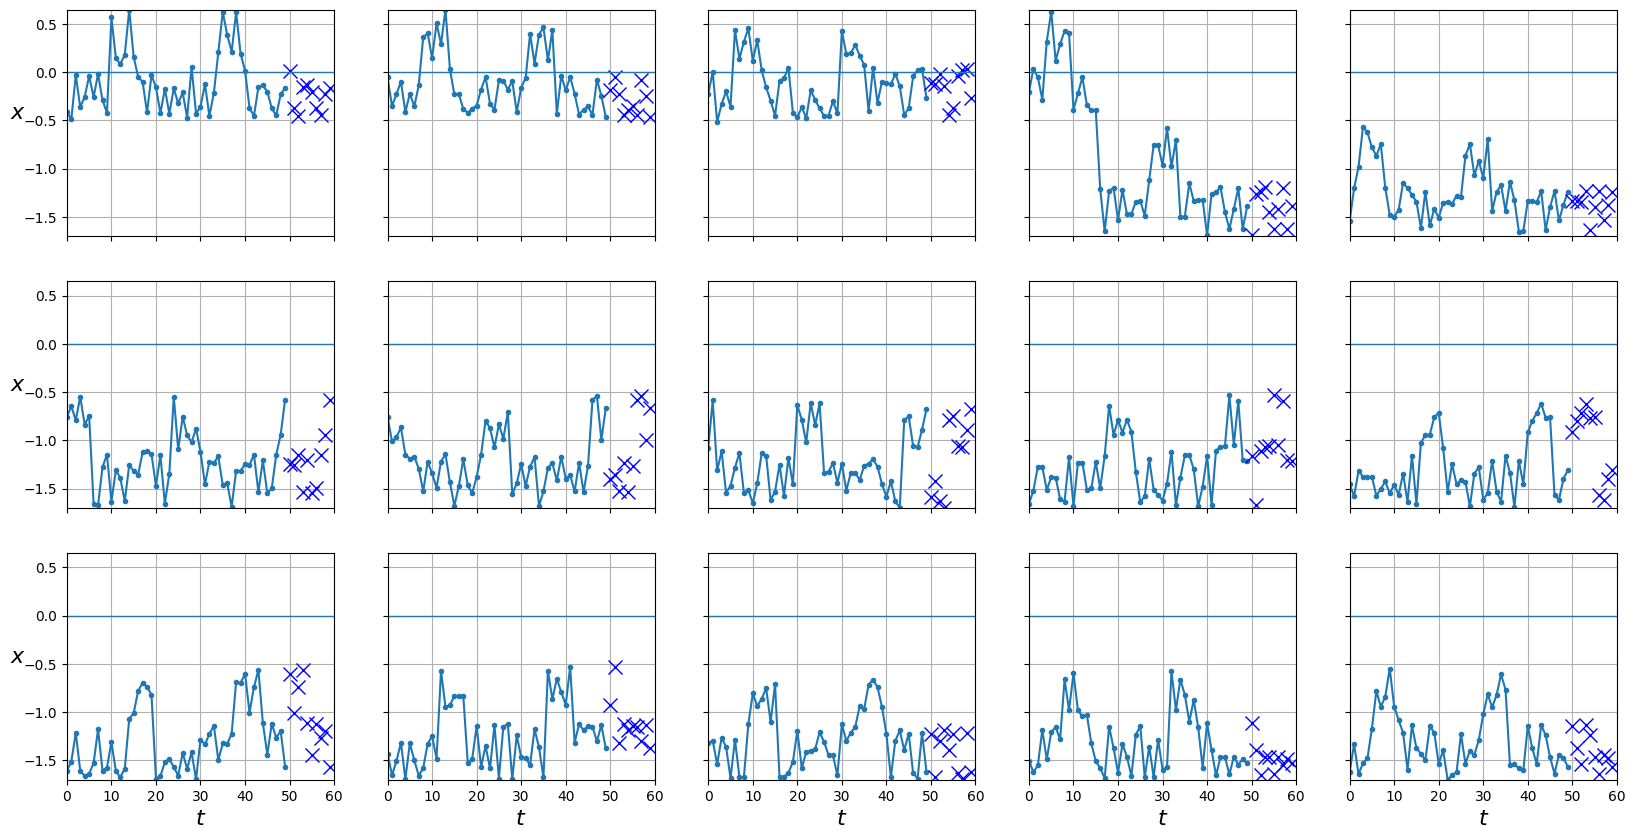

In [ ]:
plot_series(X_test, Y_test)

In [ ]:
from tqdm import tqdm
device = "cuda" if torch.cuda.is_available() else "cpu"

def fit(model, dataloader, epochs=15):
    model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=2e-2)
    criterion = torch.nn.MSELoss()
    bar = tqdm(range(1, epochs+1))
    for epoch in bar:
        model.train()
        train_loss = []
        for batch in dataloader['train']:
            X, y = batch
            X, y = X.to(device), y.to(device)
            optimizer.zero_grad()
            y_hat = model(X)
            loss = criterion(y_hat, y)
            loss.backward()
            optimizer.step()
            train_loss.append(loss.item())
        model.eval()
        eval_loss = []
        with torch.no_grad():
            for batch in dataloader['eval']:
                X, y = batch
                X, y = X.to(device), y.to(device)
                y_hat = model(X)
                loss = criterion(y_hat, y)
                eval_loss.append(loss.item())
        bar.set_description(f"loss {np.mean(train_loss):.5f} val_loss {np.mean(eval_loss):.5f}")
        
def predict(model, dataloader):
    model.eval()
    with torch.no_grad():
        preds = torch.tensor([]).to(device)
        for batch in dataloader:
            X = batch
            X = X.to(device)
            pred = model(X)
            preds = torch.cat([preds, pred])
        return preds

In [ ]:
class DeepRNN(torch.nn.Module):
  def __init__(self, n_out=10):
    super().__init__()
    self.rnn = torch.nn.RNN(input_size=1, hidden_size=10, num_layers=2, batch_first=True)
    self.fc = torch.nn.Linear(10, n_out)

  def forward(self, x):
    x, h = self.rnn(x) 
    x = self.fc(x[:,-1])
    return x

In [ ]:
rnn = DeepRNN()
fit(rnn, dataloader)

loss 0.14897 val_loss 0.13862: 100%|██████████| 15/15 [00:00<00:00, 105.00it/s]


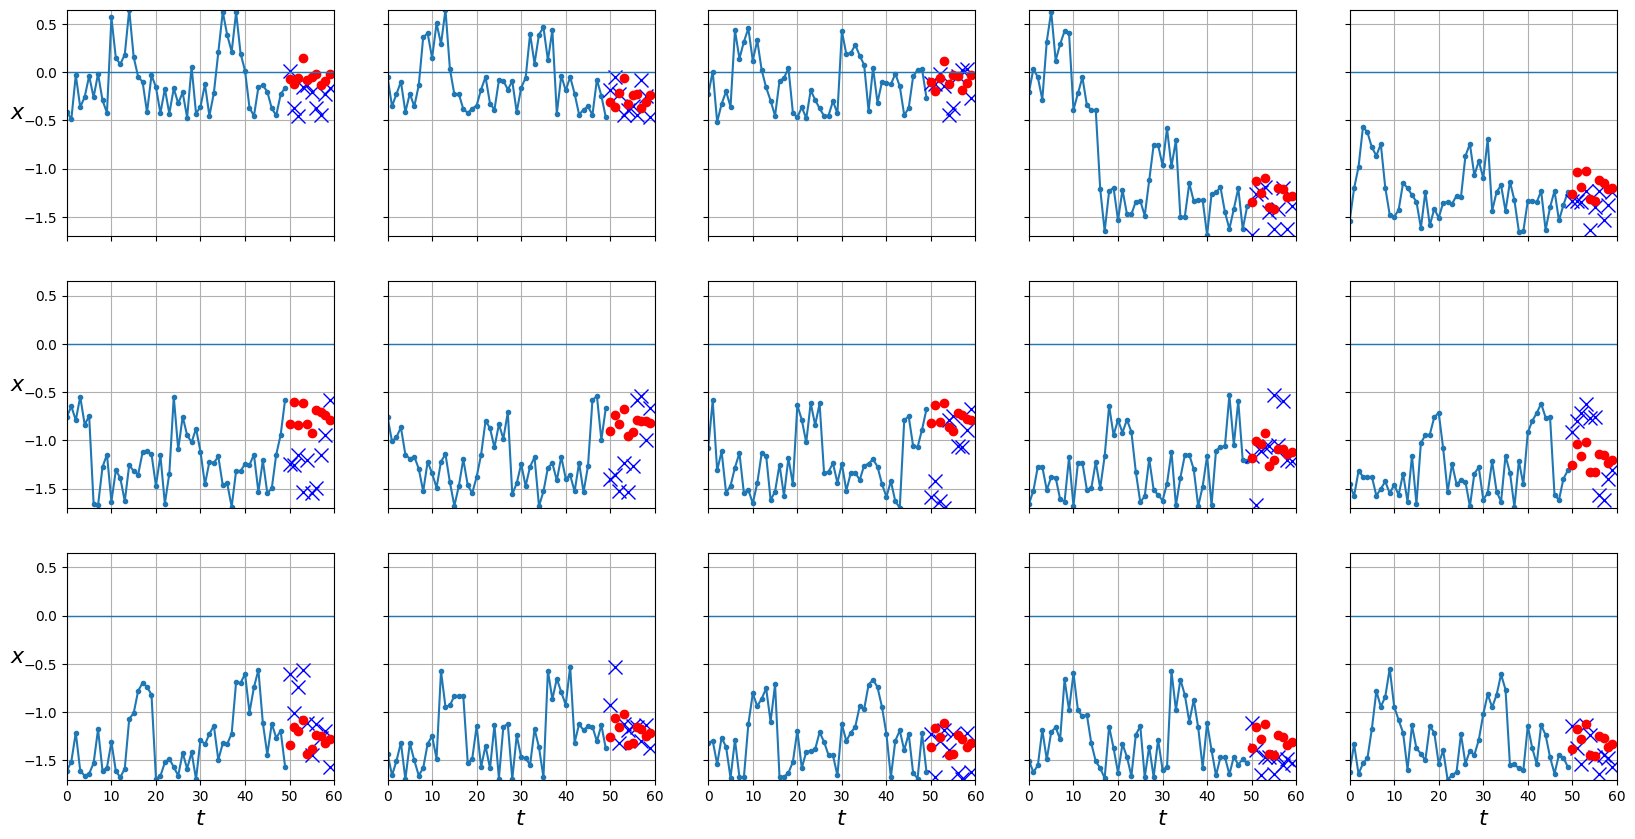

0.13519701

In [ ]:
from sklearn.metrics import mean_squared_error
y_pred = predict(rnn, dataloader['test'])
plot_series(X_test, Y_test, y_pred.cpu().numpy())
mean_squared_error(Y_test, y_pred.cpu())

In [ ]:
print(len(df))
df = np.array(df)
#df = normalize(df)
series = []
ant = 0
for i in range(50,len(df),50):
  new_x = np.asarray(df[ant:i])
  series.append(new_x)
  ant = i
series = np.array(series)
series = series[..., np.newaxis].astype(np.float32)
print(series.shape)


8760
(175, 50, 1)


In [ ]:
import math

n_steps = 40
train_size = math.trunc(series.shape[0] * 0.7)
eval_size = math.trunc(series.shape[0] * 0.2) + train_size
X_train = series[:train_size, :n_steps]
X_valid = series[train_size:eval_size, :n_steps]
X_test = series[eval_size:, :n_steps]
Y = np.empty((series.shape[0], n_steps, 10), dtype=np.float32)
for step_ahead in range(1, 10 + 1):
    Y[..., step_ahead - 1] = series[..., step_ahead:step_ahead + n_steps, 0]
Y_train = Y[:train_size]
Y_valid = Y[train_size:eval_size]
Y_test = Y[eval_size:]

dataset = {
    'train': TimeSeriesDataset(X_train, Y_train),
    'eval': TimeSeriesDataset(X_valid, Y_valid),
    'test': TimeSeriesDataset(X_test, Y_test, train=False)
}

dataloader = {
    'train': DataLoader(dataset['train'], shuffle=True, batch_size=64),
    'eval': DataLoader(dataset['eval'], shuffle=False, batch_size=64),
    'test': DataLoader(dataset['test'], shuffle=False, batch_size=64)
}

Y.shape

(175, 40, 10)

In [ ]:
"""class DeepRNN(torch.nn.Module):
  def __init__(self, n_out=10):
    super().__init__()
    self.rnn = torch.nn.RNN(input_size=1, hidden_size=10, num_layers=2, batch_first=True)
    self.fc = torch.nn.Linear(10, n_out)

  def forward(self, x):
    x, h = self.rnn(x) 
    x_reshaped = x.contiguous().view(-1, x.size(-1))
    y = self.fc(x_reshaped)
    y = y.contiguous().view(x.size(0), -1, y.size(-1))
    return y"""

'class DeepRNN(torch.nn.Module):\n  def __init__(self, n_out=10):\n    super().__init__()\n    self.rnn = torch.nn.RNN(input_size=1, hidden_size=10, num_layers=2, batch_first=True)\n    self.fc = torch.nn.Linear(10, n_out)\n\n  def forward(self, x):\n    x, h = self.rnn(x) \n    x_reshaped = x.contiguous().view(-1, x.size(-1))\n    y = self.fc(x_reshaped)\n    y = y.contiguous().view(x.size(0), -1, y.size(-1))\n    return y'

In [ ]:
"""class LSTM(DeepRNN):
  def __init__(self, n_out=1, dropout=0):
    super().__init__()
    self.rnn = torch.nn.LSTM(input_size=1, hidden_size=100, num_layers=2, dropout=dropout, batch_first=True)
    
lstm = LSTM()"""

'class LSTM(DeepRNN):\n  def __init__(self, n_out=1, dropout=0):\n    super().__init__()\n    self.rnn = torch.nn.LSTM(input_size=1, hidden_size=100, num_layers=2, dropout=dropout, batch_first=True)\n    \nlstm = LSTM()'

In [ ]:
class LSTM(torch.nn.Module):
  def __init__(self, n_out=10, dropout=0):
    super().__init__()
    self.rnn = torch.nn.LSTM(input_size=1, hidden_size=200, num_layers=2, dropout=dropout, batch_first=True)
    self.fc = torch.nn.Linear(200, n_out)
  def forward(self, x):
    x, h = self.rnn(x) 
    x_reshaped = x.contiguous().view(-1, x.size(-1))
    y = self.fc(x_reshaped)
    y = y.contiguous().view(x.size(0), -1, y.size(-1))
    return y

lstm = LSTM()

In [ ]:
# parámetros en inputs (W_ii|W_if|W_ig|W_io)
# 4 matrices, 1 para cada *gate* 

lstm.rnn.weight_ih_l0.shape, lstm.rnn.bias_ih_l0.shape

(torch.Size([800, 1]), torch.Size([800]))

In [ ]:
# parámetros en capa oculta (W_ii|W_if|W_ig|W_io)
# 4 matrices, 1 para cada *gate* 

lstm.rnn.weight_hh_l0.shape, lstm.rnn.bias_hh_l0.shape

(torch.Size([800, 200]), torch.Size([800]))

In [ ]:
# salida y capas ocultas (short term y long term)

output, (h, c) = lstm.rnn(torch.randn(10, 50, 1))

# dims -> [num_layers, batch_size, len_seq]
h.shape, c.shape

(torch.Size([2, 10, 200]), torch.Size([2, 10, 200]))

In [ ]:
def fit(model, dataloader, epochs=250):
    model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=4e-2)
    criterion = torch.nn.MSELoss()
    bar = tqdm(range(1, epochs+1))
    for epoch in bar:
        model.train()
        train_loss = []
        train_loss2 = []
        for batch in dataloader['train']:
            X, y = batch
            X, y = X.to(device), y.to(device)
            optimizer.zero_grad()
            y_hat = model(X)
            loss = criterion(y_hat, y)
            loss.backward()
            optimizer.step()
            train_loss.append(loss.item())
            train_loss2.append((y[:,-1] - y_hat[:,-1]).pow(2).mean().item())
        model.eval()
        eval_loss = []
        eval_loss2 = []
        with torch.no_grad():
            for batch in dataloader['eval']:
                X, y = batch
                X, y = X.to(device), y.to(device)
                y_hat = model(X)
                loss = criterion(y_hat, y)
                eval_loss.append(loss.item())
                eval_loss2.append((y[:,-1] - y_hat[:,-1]).pow(2).mean().item())
        bar.set_description(f"loss {np.mean(train_loss):.5f} loss_last_step {np.mean(train_loss2):.5f} val_loss {np.mean(eval_loss):.5f} val_loss_last_step {np.mean(eval_loss2):.5f}")

In [ ]:
lstm = LSTM()
fit(lstm, dataloader)

loss 0.14739 loss_last_step 0.14798 val_loss 0.09689 val_loss_last_step 0.09323: 100%|██████████| 250/250 [00:04<00:00, 54.71it/s]


mean_squared_error se utiliza para calcular el error cuadrático medio entre las etiquetas verdaderas y las predicciones.

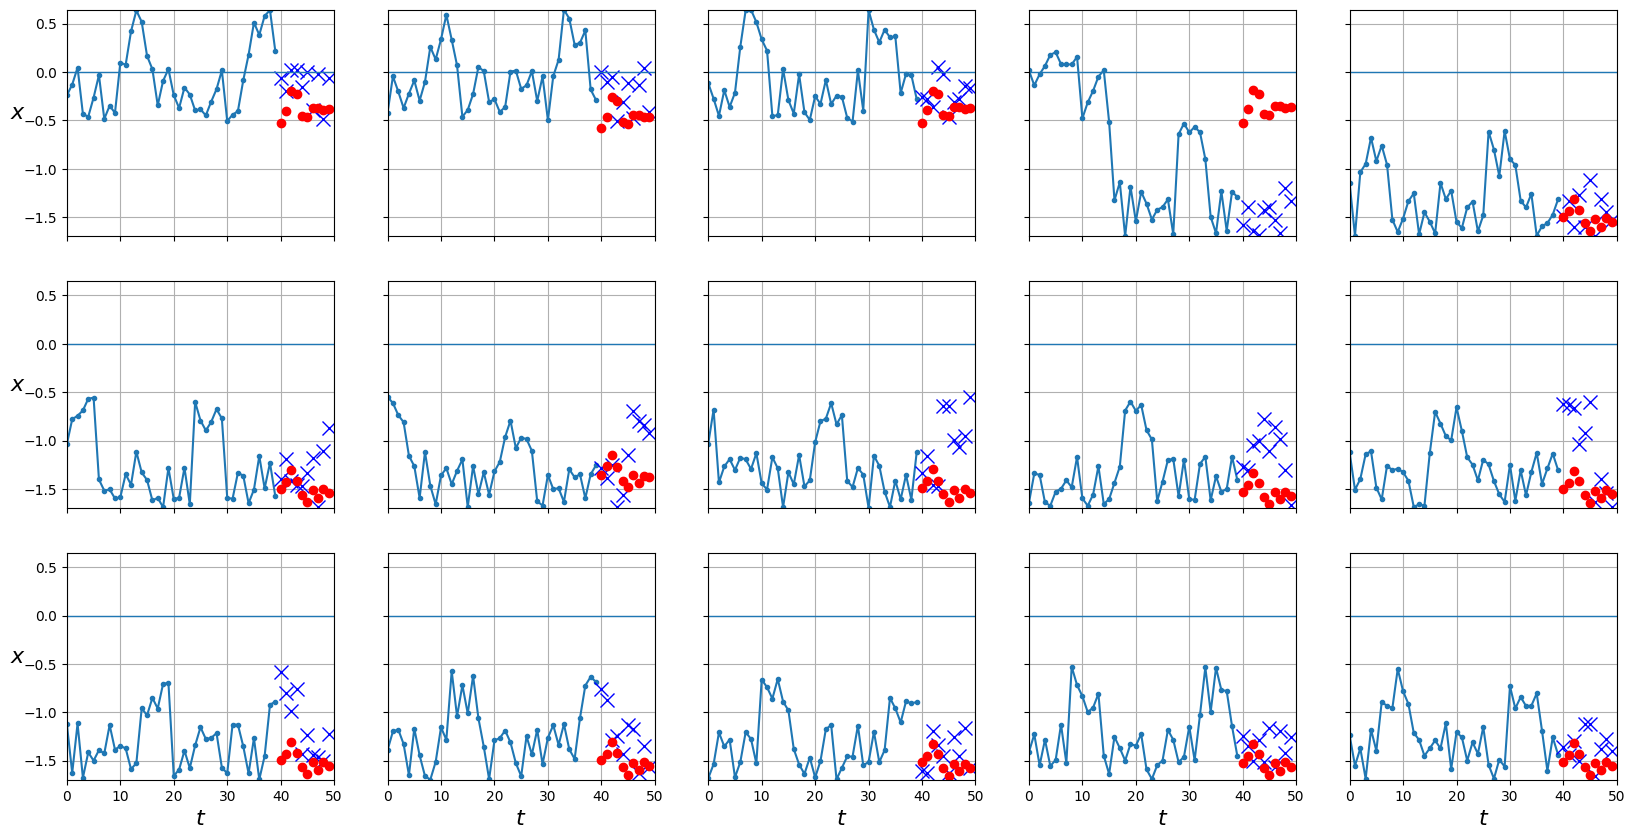

0.19377044

In [ ]:
y_pred = predict(lstm, dataloader['test'])
plot_series(X_test, Y_test[:,-1], y_pred[:,-1].cpu().numpy())
mean_squared_error(Y_test[:,-1], y_pred[:,-1].cpu())

In [ ]:
y_pred.shape

torch.Size([18, 40, 10])

In [ ]:
# Mueve el tensor de la GPU a la CPU
#Y_test
y_pred_cpu = y_pred.cpu()
# Convierte el tensor en un arreglo NumPy
y_pred_array = y_pred_cpu.numpy()
y_pred_m = denormalize(y_pred_array[:,-1], data)

y_test_array = denormalize(Y_test[:,-1], data) 

y_pred_m.shape, y_test_array.shape

((18, 10), (18, 10))

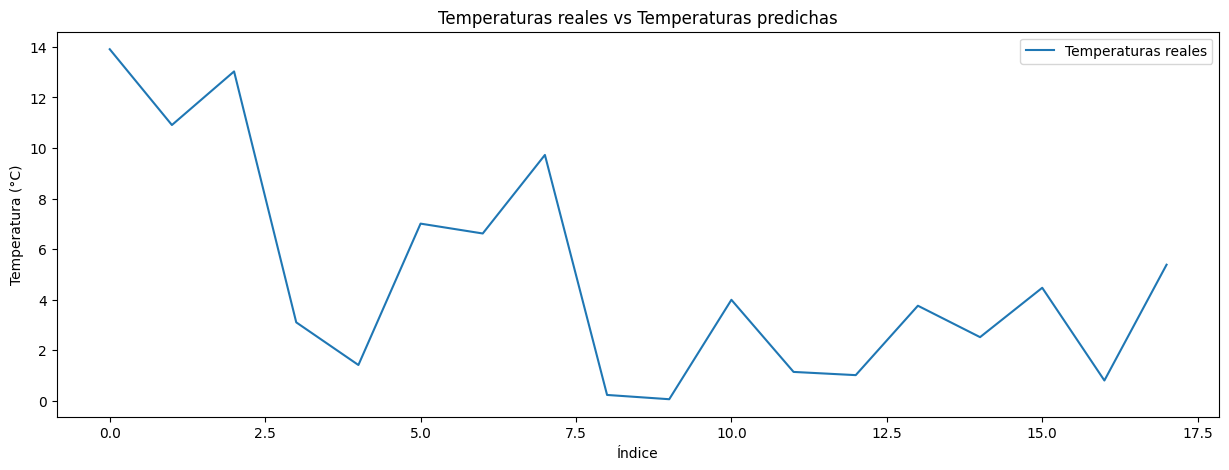

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Crear el eje x de la gráfica (por ejemplo, usando el índice de las temperaturas)
x = np.arange(len(y_test_array))
# Graficar las temperaturas reales y predichas en la misma gráfica
plt.plot(x, y_test_array[:,-1], label='Temperaturas reales')
#plt.plot(x, y_pred_m[:,-1], label='Temperaturas predichas')
# Agregar título y etiquetas de los ejes
plt.title('Temperaturas reales vs Temperaturas predichas')
plt.xlabel('Índice')
plt.ylabel('Temperatura (°C)')
# Agregar leyenda
plt.legend()
# Mostrar la gráfica
plt.show()

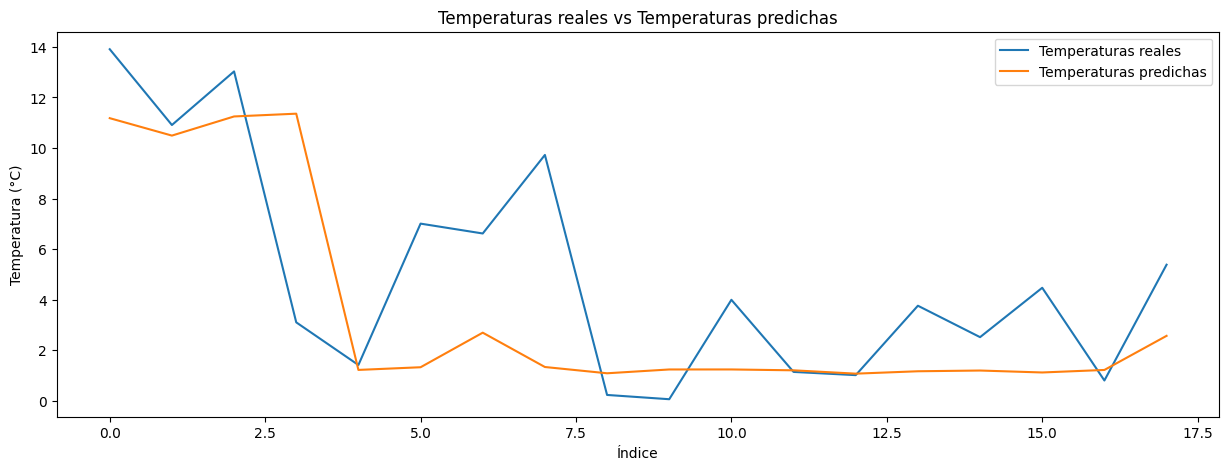

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Crear el eje x de la gráfica (por ejemplo, usando el índice de las temperaturas)
x = np.arange(len(y_test_array))
# Graficar las temperaturas reales y predichas en la misma gráfica
plt.plot(x, y_test_array[:,-1], label='Temperaturas reales')
plt.plot(x, y_pred_m[:,-1], label='Temperaturas predichas')
# Agregar título y etiquetas de los ejes
plt.title('Temperaturas reales vs Temperaturas predichas')
plt.xlabel('Índice')
plt.ylabel('Temperatura (°C)')
# Agregar leyenda
plt.legend()
# Mostrar la gráfica
plt.show()
